In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel

C:\Users\irots\anaconda3\envs\noa2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Italy/Veneto/Culex/IT_veneto_culex_2010_2022.csv')
#=====================================================================
data = data[data.trap_type != 'Gravid Trap']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['dt_placement', 'x', 'y', 'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/th_Italy_Veneto_shapefile_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/th_Italy_Veneto_shapefile_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN class regression Africa augmented'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Italy/Veneto/Culex/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions of the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, imput_list=[date_col], env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

In [7]:
model = FeedforwardNeuralNetModel(output_len=1, hidden_layers=[500,300,200,100], model_type=model_type, learning_rate=0.001,
                                  epochs=100, batch_size=128, dropout=.3,embedding_data=embedded_data,val_metrics=['mae'],
                                  transformation_list=transformation_list)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x000001C4E49B0C40>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x000001C4E49B0C40>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
41/41 [==============================] - 2s 11ms/step - loss: 70413.3516 - mae: 148.8804 - val_loss: 163950.4688 - val_mae: 193.7263
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 68167.2109 - mae: 145.6325 - val_loss: 158179.8750 - val_mae: 188.7294
Epoch 3/100
41/41 [==============================] - 0s 7ms/s

41/41 [==============================] - 0s 7ms/step - loss: 10583.3281 - mae: 66.5673 - val_loss: 70471.0625 - val_mae: 116.2798
Epoch 51/100
41/41 [==============================] - 0s 7ms/step - loss: 10575.0400 - mae: 66.4415 - val_loss: 69185.2500 - val_mae: 116.1329
Epoch 52/100
41/41 [==============================] - 0s 7ms/step - loss: 10051.7178 - mae: 64.9736 - val_loss: 71656.2734 - val_mae: 116.4090
Epoch 53/100
41/41 [==============================] - 0s 7ms/step - loss: 9846.0850 - mae: 64.6663 - val_loss: 72766.2109 - val_mae: 115.7493
Epoch 54/100
41/41 [==============================] - 0s 7ms/step - loss: 10521.3633 - mae: 65.5564 - val_loss: 71543.6641 - val_mae: 115.2129
Epoch 55/100
41/41 [==============================] - 0s 7ms/step - loss: 9478.9697 - mae: 63.4406 - val_loss: 72100.0312 - val_mae: 114.5292
Epoch 56/100
41/41 [==============================] - 0s 7ms/step - loss: 9435.5996 - mae: 63.1928 - val_loss: 74427.3828 - val_mae: 115.3220
Epoch 57/100
41

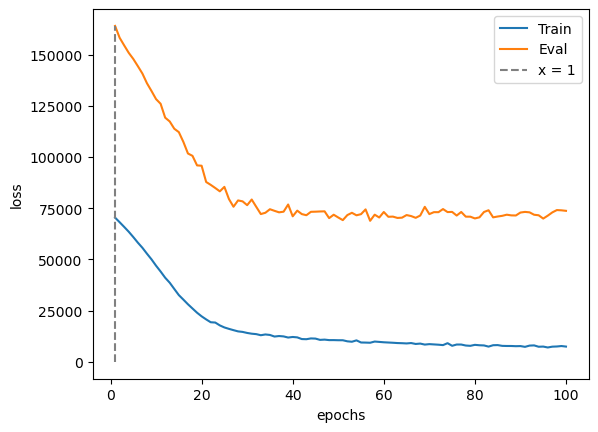

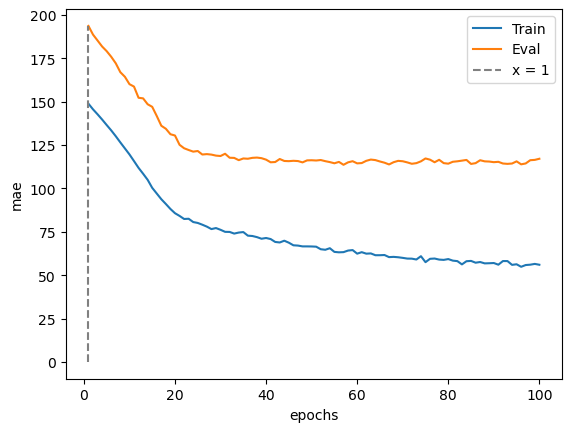

40/40 [==============================] - 0s 1ms/step
MAE on train set:  34.624564796905226
min prediction: 0.0
max prediction: 815.0

MAE on test set:  117.2387351778656
Error <= 30: 44.43 %
min prediction: 0.0
max prediction: 815.0


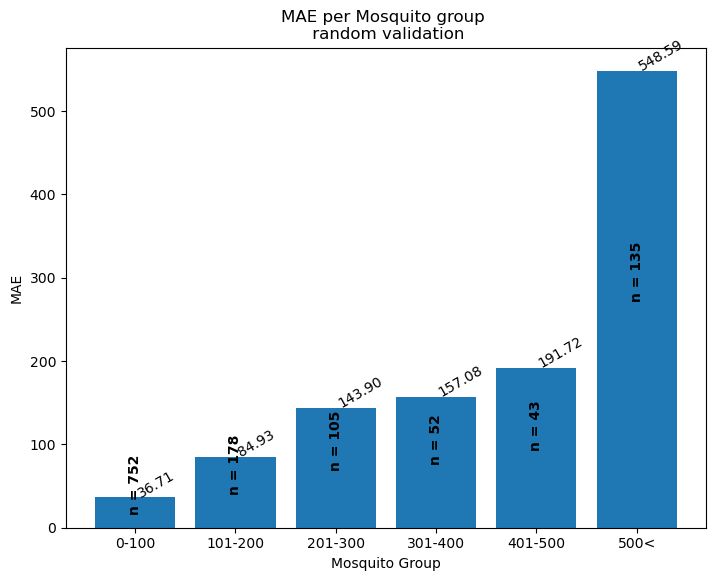

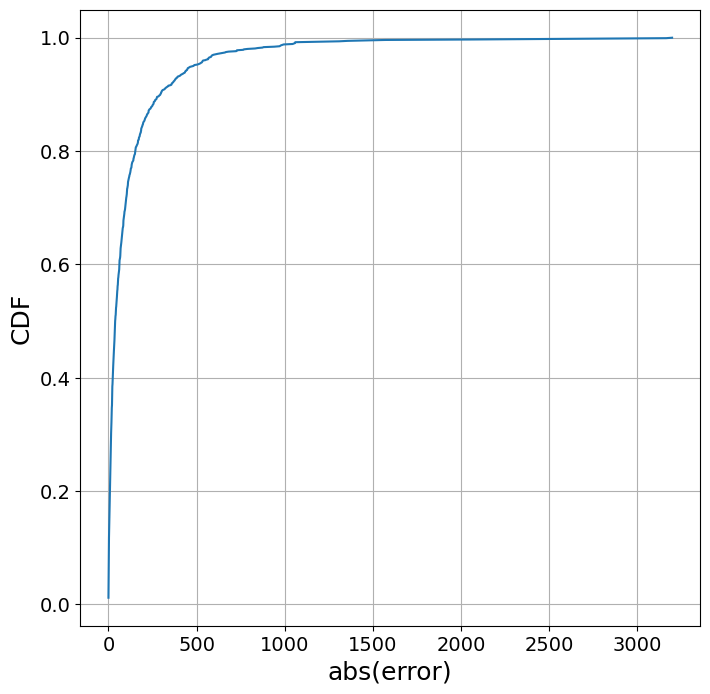

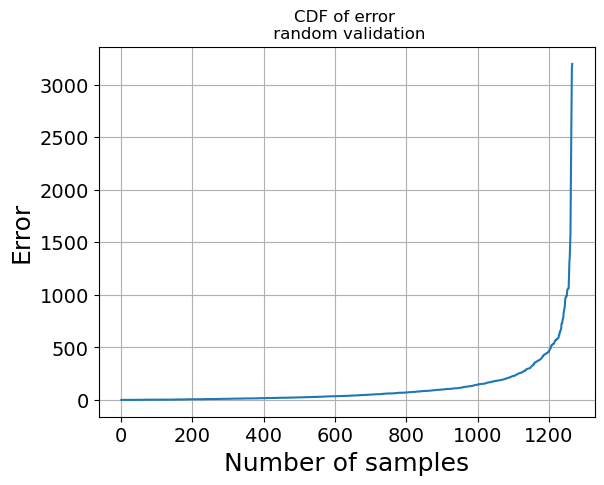

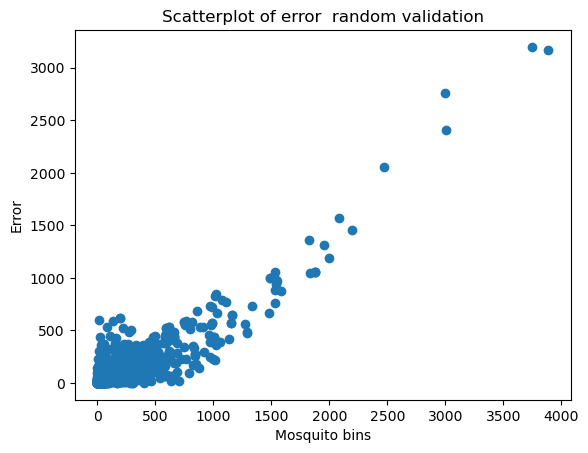

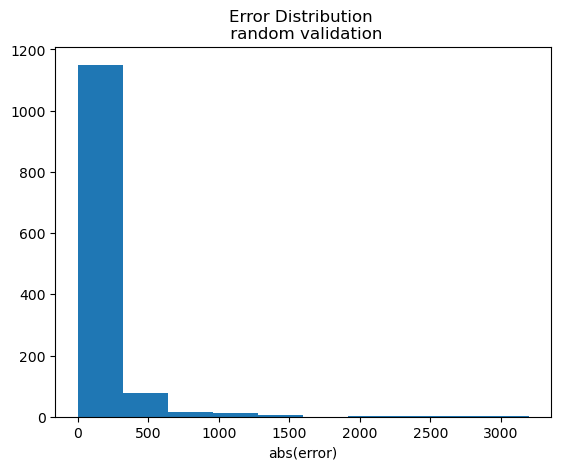

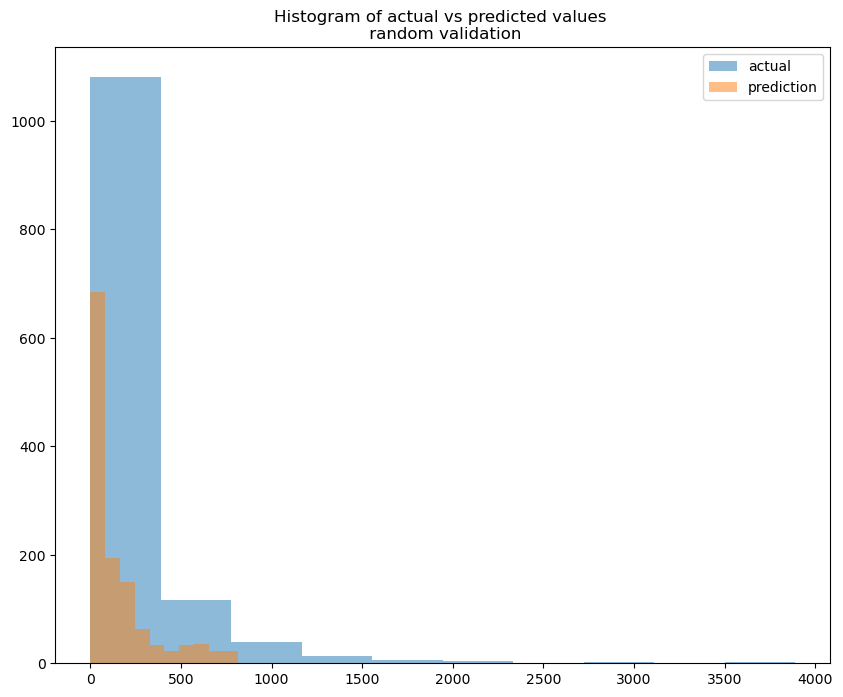

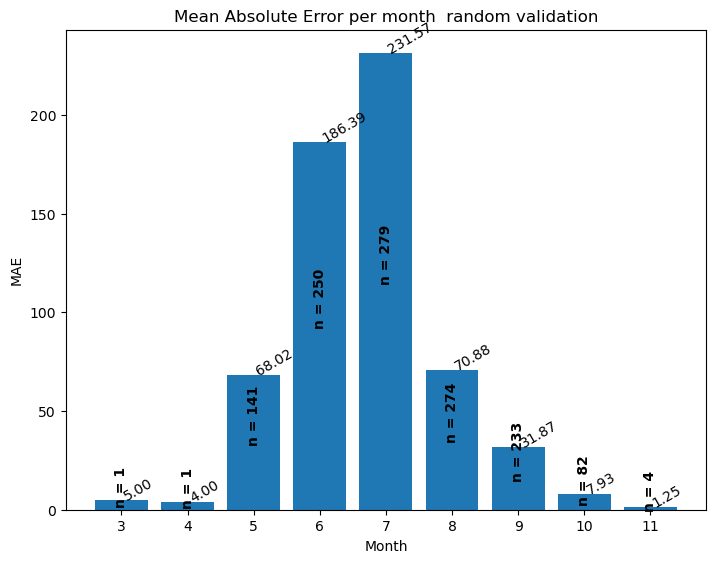

In [8]:
test_model_random_split(data, model, filepath = '', date_col = 'dt_placement', case='', export=False)

Epoch 1/100
45/45 [==============================] - 2s 10ms/step - loss: 65682.5703 - mae: 145.3190 - val_loss: 236287.2656 - val_mae: 232.1970
Epoch 2/100
45/45 [==============================] - 0s 7ms/step - loss: 63279.8711 - mae: 141.8166 - val_loss: 233678.4062 - val_mae: 230.5989
Epoch 3/100
45/45 [==============================] - 0s 7ms/step - loss: 60768.1016 - mae: 138.7518 - val_loss: 229635.3594 - val_mae: 227.9232
Epoch 4/100
45/45 [==============================] - 0s 7ms/step - loss: 58191.8203 - mae: 135.3255 - val_loss: 225839.3125 - val_mae: 225.1163
Epoch 5/100
45/45 [==============================] - 0s 7ms/step - loss: 55461.1602 - mae: 131.5207 - val_loss: 222826.7188 - val_mae: 223.3680
Epoch 6/100
45/45 [==============================] - 0s 7ms/step - loss: 52672.6914 - mae: 127.8381 - val_loss: 216445.9844 - val_mae: 218.2825
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 49745.4219 - mae: 124.1243 - val_loss: 214496.6250 - val_mae: 

Epoch 58/100
45/45 [==============================] - 0s 8ms/step - loss: 8728.7129 - mae: 61.1604 - val_loss: 138330.9688 - val_mae: 170.1823
Epoch 59/100
45/45 [==============================] - 0s 8ms/step - loss: 8937.9922 - mae: 61.7050 - val_loss: 139727.5156 - val_mae: 170.8643
Epoch 60/100
45/45 [==============================] - 0s 9ms/step - loss: 8949.9502 - mae: 61.2064 - val_loss: 136586.7656 - val_mae: 170.6194
Epoch 61/100
45/45 [==============================] - 0s 8ms/step - loss: 8937.5791 - mae: 60.6018 - val_loss: 142339.0156 - val_mae: 170.2219
Epoch 62/100
45/45 [==============================] - 0s 9ms/step - loss: 8586.6016 - mae: 60.0386 - val_loss: 135593.8906 - val_mae: 170.2947
Epoch 63/100
45/45 [==============================] - 0s 9ms/step - loss: 8663.5479 - mae: 60.3849 - val_loss: 139265.3125 - val_mae: 171.4394
Epoch 64/100
45/45 [==============================] - 0s 9ms/step - loss: 8216.8525 - mae: 59.7745 - val_loss: 138208.9375 - val_mae: 170.4485

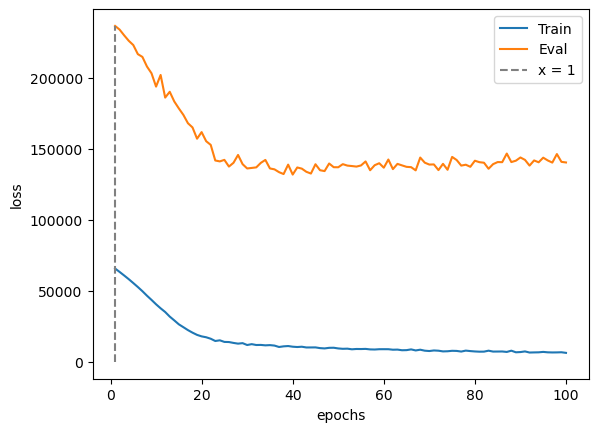

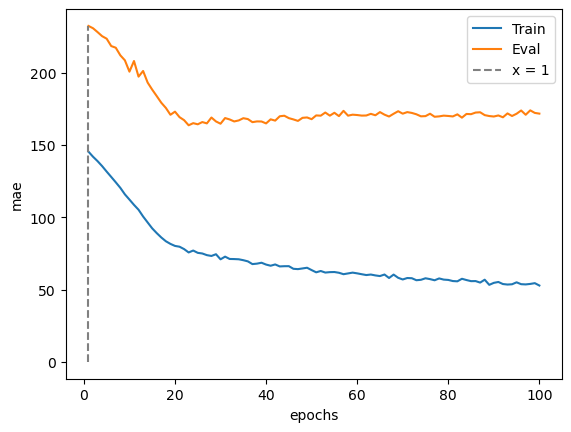

20/20 [==============================] - 0s 2ms/step
Epoch 1/100
45/45 [==============================] - 2s 11ms/step - loss: 66080.4922 - mae: 144.1656 - val_loss: 230892.1562 - val_mae: 242.4304
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 63707.0547 - mae: 140.6409 - val_loss: 226388.3281 - val_mae: 239.4009
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 61174.4062 - mae: 137.5463 - val_loss: 218968.0156 - val_mae: 233.8117
Epoch 4/100
45/45 [==============================] - 0s 8ms/step - loss: 58566.9727 - mae: 134.1545 - val_loss: 215168.7812 - val_mae: 230.9203
Epoch 5/100
45/45 [==============================] - 0s 8ms/step - loss: 55811.7891 - mae: 130.5426 - val_loss: 210794.3594 - val_mae: 227.7045
Epoch 6/100
45/45 [==============================] - 0s 8ms/step - loss: 53017.6484 - mae: 126.8240 - val_loss: 203181.3281 - val_mae: 220.2115
Epoch 7/100
45/45 [==============================] - 0s 8ms/step - loss: 50024.316

45/45 [==============================] - 0s 8ms/step - loss: 9064.6963 - mae: 61.5826 - val_loss: 118348.3750 - val_mae: 156.5089
Epoch 58/100
45/45 [==============================] - 0s 9ms/step - loss: 8762.3789 - mae: 61.0244 - val_loss: 119232.8594 - val_mae: 156.0336
Epoch 59/100
45/45 [==============================] - 0s 8ms/step - loss: 8862.1250 - mae: 60.9583 - val_loss: 114526.0625 - val_mae: 154.4903
Epoch 60/100
45/45 [==============================] - 0s 9ms/step - loss: 9384.6768 - mae: 61.6762 - val_loss: 117162.0625 - val_mae: 153.5346
Epoch 61/100
45/45 [==============================] - 0s 8ms/step - loss: 9290.0459 - mae: 61.2277 - val_loss: 117862.3281 - val_mae: 154.9165
Epoch 62/100
45/45 [==============================] - 0s 8ms/step - loss: 8642.5352 - mae: 59.9995 - val_loss: 125252.8047 - val_mae: 160.7458
Epoch 63/100
45/45 [==============================] - 0s 9ms/step - loss: 8875.8369 - mae: 60.9783 - val_loss: 122613.4062 - val_mae: 158.7619
Epoch 64/100

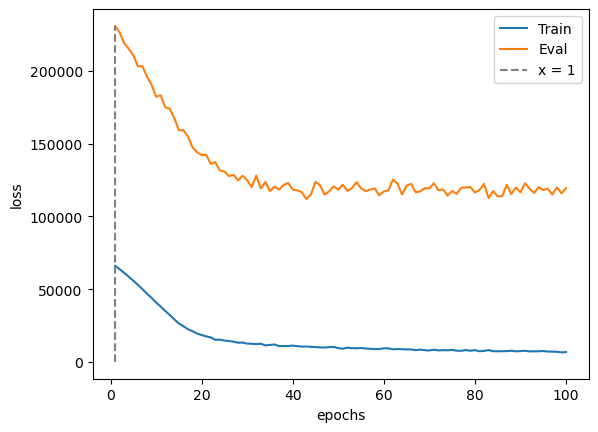

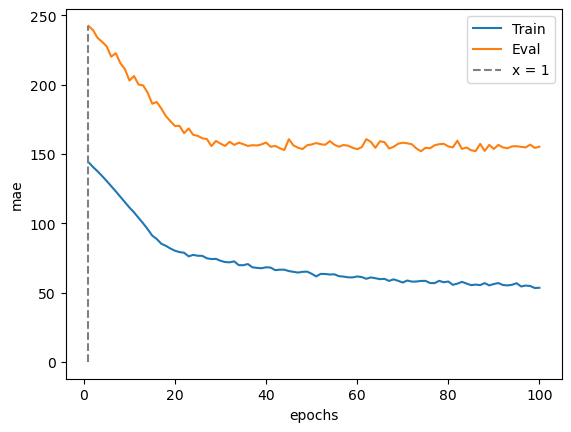

20/20 [==============================] - 0s 1ms/step
Epoch 1/100
45/45 [==============================] - 2s 10ms/step - loss: 72370.3125 - mae: 153.4924 - val_loss: 213073.6875 - val_mae: 160.3450
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 69889.5469 - mae: 149.9688 - val_loss: 207551.2656 - val_mae: 155.6777
Epoch 3/100
45/45 [==============================] - 0s 6ms/step - loss: 67234.5469 - mae: 146.7910 - val_loss: 201115.4688 - val_mae: 149.7845
Epoch 4/100
45/45 [==============================] - 0s 7ms/step - loss: 64462.8867 - mae: 143.4186 - val_loss: 198891.8125 - val_mae: 148.1367
Epoch 5/100
45/45 [==============================] - 0s 8ms/step - loss: 61585.3555 - mae: 139.7287 - val_loss: 193766.0312 - val_mae: 143.1667
Epoch 6/100
45/45 [==============================] - 0s 8ms/step - loss: 58548.0977 - mae: 135.7085 - val_loss: 189794.7500 - val_mae: 139.5052
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 55371.605

45/45 [==============================] - 0s 9ms/step - loss: 9681.0605 - mae: 64.2448 - val_loss: 133004.3906 - val_mae: 131.2023
Epoch 58/100
45/45 [==============================] - 0s 9ms/step - loss: 9411.2383 - mae: 63.8096 - val_loss: 131960.5625 - val_mae: 129.8657
Epoch 59/100
45/45 [==============================] - 0s 9ms/step - loss: 9837.3447 - mae: 64.7980 - val_loss: 131808.1250 - val_mae: 135.6634
Epoch 60/100
45/45 [==============================] - 0s 9ms/step - loss: 9962.5615 - mae: 64.4088 - val_loss: 132399.7969 - val_mae: 132.2151
Epoch 61/100
45/45 [==============================] - 0s 9ms/step - loss: 9650.7793 - mae: 63.3655 - val_loss: 135079.9688 - val_mae: 130.1388
Epoch 62/100
45/45 [==============================] - 0s 9ms/step - loss: 9373.1006 - mae: 63.0247 - val_loss: 136173.9219 - val_mae: 129.1234
Epoch 63/100
45/45 [==============================] - 0s 9ms/step - loss: 9287.5205 - mae: 62.9397 - val_loss: 135290.0312 - val_mae: 130.8462
Epoch 64/100

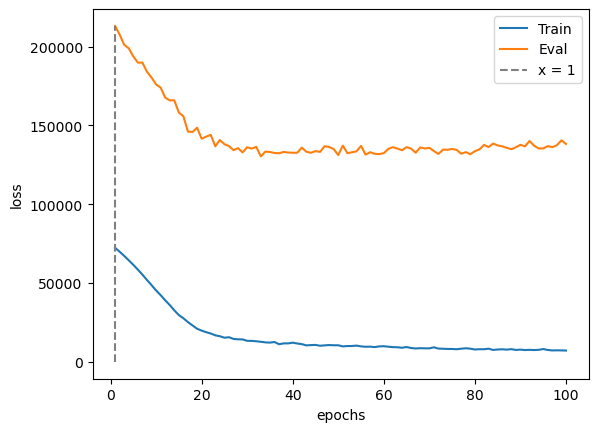

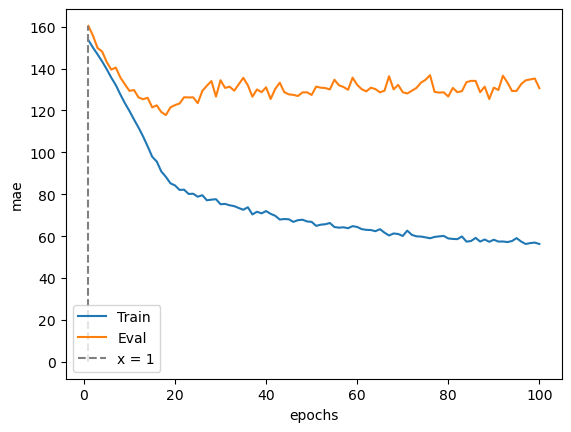

20/20 [==============================] - 0s 2ms/step
Epoch 1/100
45/45 [==============================] - 2s 11ms/step - loss: 76977.6016 - mae: 156.2971 - val_loss: 82627.7891 - val_mae: 129.4996
Epoch 2/100
45/45 [==============================] - 0s 7ms/step - loss: 74359.3594 - mae: 152.7775 - val_loss: 80617.2109 - val_mae: 126.1444
Epoch 3/100
45/45 [==============================] - 0s 9ms/step - loss: 71601.7500 - mae: 149.5917 - val_loss: 78267.5703 - val_mae: 122.9940
Epoch 4/100
45/45 [==============================] - 0s 8ms/step - loss: 68673.7500 - mae: 146.1634 - val_loss: 77091.5234 - val_mae: 121.5619
Epoch 5/100
45/45 [==============================] - 0s 8ms/step - loss: 65651.6328 - mae: 142.4164 - val_loss: 74998.5625 - val_mae: 119.1837
Epoch 6/100
45/45 [==============================] - 0s 8ms/step - loss: 62587.8398 - mae: 138.4616 - val_loss: 73693.7188 - val_mae: 117.9949
Epoch 7/100
45/45 [==============================] - 0s 8ms/step - loss: 59144.3242 - ma

45/45 [==============================] - 0s 8ms/step - loss: 10216.7354 - mae: 65.2200 - val_loss: 66617.4219 - val_mae: 127.6166
Epoch 58/100
45/45 [==============================] - 0s 8ms/step - loss: 9957.1123 - mae: 65.0442 - val_loss: 69189.7656 - val_mae: 132.2342
Epoch 59/100
45/45 [==============================] - 0s 8ms/step - loss: 10237.0488 - mae: 64.8631 - val_loss: 70243.6875 - val_mae: 135.0583
Epoch 60/100
45/45 [==============================] - 0s 8ms/step - loss: 9761.7861 - mae: 64.1035 - val_loss: 72365.7656 - val_mae: 135.1640
Epoch 61/100
45/45 [==============================] - 0s 8ms/step - loss: 9663.1953 - mae: 63.2416 - val_loss: 71980.4453 - val_mae: 135.9434
Epoch 62/100
45/45 [==============================] - 0s 9ms/step - loss: 9680.5020 - mae: 63.2168 - val_loss: 71372.9922 - val_mae: 134.2058
Epoch 63/100
45/45 [==============================] - 0s 9ms/step - loss: 9661.0195 - mae: 63.3822 - val_loss: 71480.4375 - val_mae: 137.2261
Epoch 64/100
45/4

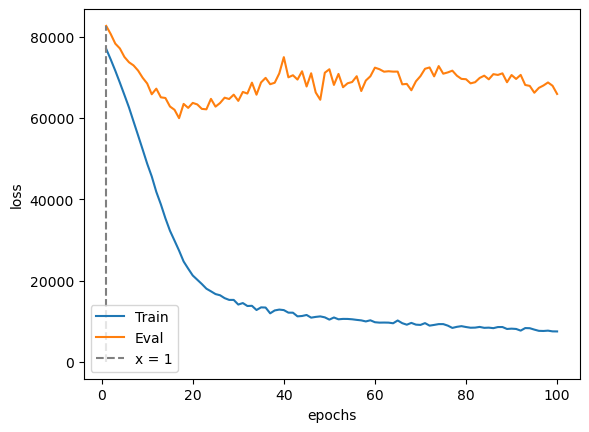

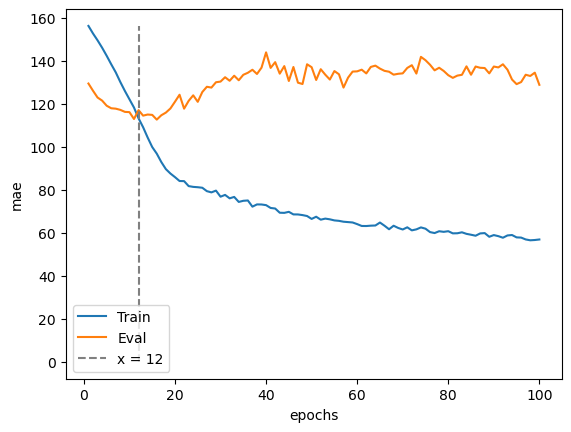

20/20 [==============================] - 0s 1ms/step
Epoch 1/100
45/45 [==============================] - 2s 11ms/step - loss: 76624.5625 - mae: 156.6507 - val_loss: 76709.5078 - val_mae: 123.6223
Epoch 2/100
45/45 [==============================] - 0s 9ms/step - loss: 74062.8047 - mae: 153.1825 - val_loss: 73837.1094 - val_mae: 120.1109
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 71330.0000 - mae: 149.9581 - val_loss: 71533.9766 - val_mae: 117.1082
Epoch 4/100
45/45 [==============================] - 0s 8ms/step - loss: 68453.3281 - mae: 146.5068 - val_loss: 69638.9922 - val_mae: 114.3401
Epoch 5/100
45/45 [==============================] - 0s 9ms/step - loss: 65506.5898 - mae: 142.8021 - val_loss: 67791.4922 - val_mae: 111.5216
Epoch 6/100
45/45 [==============================] - 0s 9ms/step - loss: 62458.2773 - mae: 138.8682 - val_loss: 65505.9023 - val_mae: 108.9913
Epoch 7/100
45/45 [==============================] - 0s 9ms/step - loss: 59049.4805 - ma

Epoch 58/100
45/45 [==============================] - 0s 9ms/step - loss: 10091.6611 - mae: 65.3667 - val_loss: 42545.0156 - val_mae: 94.0084
Epoch 59/100
45/45 [==============================] - 0s 9ms/step - loss: 10341.9824 - mae: 65.1192 - val_loss: 41790.7852 - val_mae: 96.8296
Epoch 60/100
45/45 [==============================] - 0s 9ms/step - loss: 10508.4102 - mae: 66.3040 - val_loss: 40626.2031 - val_mae: 96.7747
Epoch 61/100
45/45 [==============================] - 0s 10ms/step - loss: 10011.4521 - mae: 65.1090 - val_loss: 40835.3164 - val_mae: 97.4062
Epoch 62/100
45/45 [==============================] - 0s 9ms/step - loss: 10038.4238 - mae: 64.7634 - val_loss: 40311.5625 - val_mae: 92.9692
Epoch 63/100
45/45 [==============================] - 0s 9ms/step - loss: 9812.6611 - mae: 64.1503 - val_loss: 40280.8164 - val_mae: 95.4843
Epoch 64/100
45/45 [==============================] - 0s 9ms/step - loss: 9815.4482 - mae: 64.1657 - val_loss: 39901.3242 - val_mae: 94.8686
Epoch 6

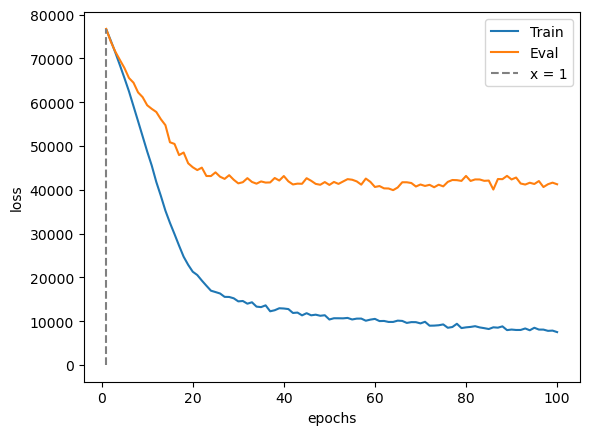

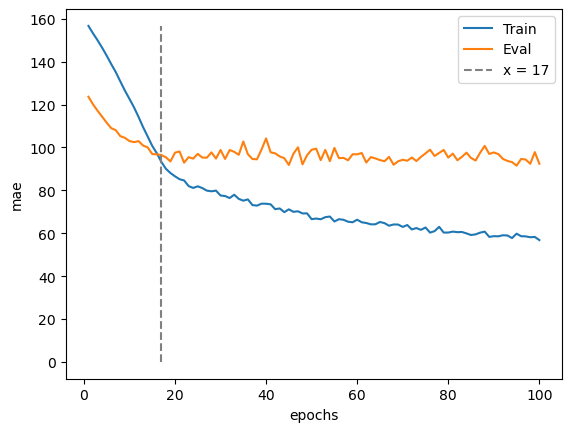

20/20 [==============================] - 0s 2ms/step
Epoch 1/100
45/45 [==============================] - 2s 11ms/step - loss: 72875.8281 - mae: 152.5623 - val_loss: 115581.9688 - val_mae: 157.8406
Epoch 2/100
45/45 [==============================] - 0s 10ms/step - loss: 70374.7578 - mae: 149.0590 - val_loss: 111624.8750 - val_mae: 153.5615
Epoch 3/100
45/45 [==============================] - 0s 9ms/step - loss: 67743.8047 - mae: 145.9626 - val_loss: 107526.4844 - val_mae: 148.9306
Epoch 4/100
45/45 [==============================] - 0s 8ms/step - loss: 64918.7617 - mae: 142.5686 - val_loss: 104555.8984 - val_mae: 145.0712
Epoch 5/100
45/45 [==============================] - 0s 9ms/step - loss: 62001.3711 - mae: 138.9355 - val_loss: 102691.0625 - val_mae: 142.3932
Epoch 6/100
45/45 [==============================] - 1s 14ms/step - loss: 59089.4180 - mae: 135.1073 - val_loss: 98117.8203 - val_mae: 137.5800
Epoch 7/100
45/45 [==============================] - 1s 15ms/step - loss: 55772.1

45/45 [==============================] - 0s 9ms/step - loss: 9786.6641 - mae: 64.2205 - val_loss: 66864.3438 - val_mae: 122.3442
Epoch 58/100
45/45 [==============================] - 0s 9ms/step - loss: 9519.1543 - mae: 63.4182 - val_loss: 65933.4297 - val_mae: 120.4870
Epoch 59/100
45/45 [==============================] - 0s 9ms/step - loss: 9859.7783 - mae: 63.8463 - val_loss: 65022.8750 - val_mae: 119.0593
Epoch 60/100
45/45 [==============================] - 0s 10ms/step - loss: 9749.0723 - mae: 63.8327 - val_loss: 66676.0938 - val_mae: 119.6975
Epoch 61/100
45/45 [==============================] - 0s 10ms/step - loss: 9355.9736 - mae: 63.1176 - val_loss: 65713.4375 - val_mae: 116.2166
Epoch 62/100
45/45 [==============================] - 0s 10ms/step - loss: 9155.3652 - mae: 62.2830 - val_loss: 66632.8359 - val_mae: 115.2898
Epoch 63/100
45/45 [==============================] - 0s 10ms/step - loss: 9210.3301 - mae: 62.1720 - val_loss: 67914.6250 - val_mae: 117.0403
Epoch 64/100
45

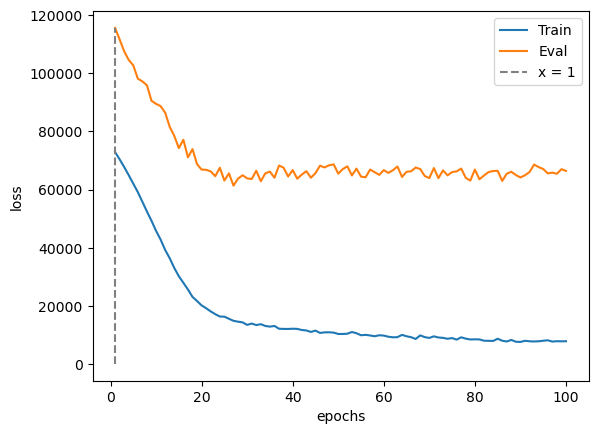

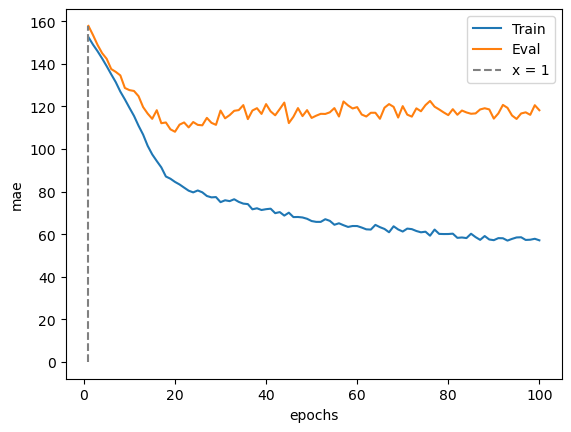

20/20 [==============================] - 0s 3ms/step
Epoch 1/100
45/45 [==============================] - 2s 12ms/step - loss: 73031.1641 - mae: 153.4863 - val_loss: 176248.8125 - val_mae: 159.4969
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 70490.3047 - mae: 149.9906 - val_loss: 171021.5938 - val_mae: 153.4480
Epoch 3/100
45/45 [==============================] - 0s 9ms/step - loss: 67847.6562 - mae: 146.8192 - val_loss: 167001.7188 - val_mae: 149.4623
Epoch 4/100
45/45 [==============================] - 0s 9ms/step - loss: 65056.3945 - mae: 143.5022 - val_loss: 164134.5781 - val_mae: 145.9693
Epoch 5/100
45/45 [==============================] - 0s 10ms/step - loss: 62175.6016 - mae: 139.8362 - val_loss: 161115.9219 - val_mae: 143.3508
Epoch 6/100
45/45 [==============================] - 0s 9ms/step - loss: 59221.0195 - mae: 135.8312 - val_loss: 158319.6406 - val_mae: 140.9672
Epoch 7/100
45/45 [==============================] - 0s 8ms/step - loss: 55955.70

Epoch 57/100
45/45 [==============================] - 0s 11ms/step - loss: 9890.1357 - mae: 64.7611 - val_loss: 134368.8125 - val_mae: 142.2719
Epoch 58/100
45/45 [==============================] - 0s 9ms/step - loss: 9872.2109 - mae: 64.7585 - val_loss: 135643.9844 - val_mae: 145.2369
Epoch 59/100
45/45 [==============================] - 0s 9ms/step - loss: 9660.9307 - mae: 64.4033 - val_loss: 132886.8906 - val_mae: 145.4156
Epoch 60/100
45/45 [==============================] - 0s 10ms/step - loss: 9809.4170 - mae: 64.9113 - val_loss: 135645.3750 - val_mae: 147.1751
Epoch 61/100
45/45 [==============================] - 0s 10ms/step - loss: 9860.7080 - mae: 64.6007 - val_loss: 130996.0938 - val_mae: 139.3427
Epoch 62/100
45/45 [==============================] - 0s 9ms/step - loss: 9152.7969 - mae: 62.5834 - val_loss: 132584.3125 - val_mae: 135.8850
Epoch 63/100
45/45 [==============================] - 0s 9ms/step - loss: 9308.7549 - mae: 62.8906 - val_loss: 133479.3125 - val_mae: 144.0

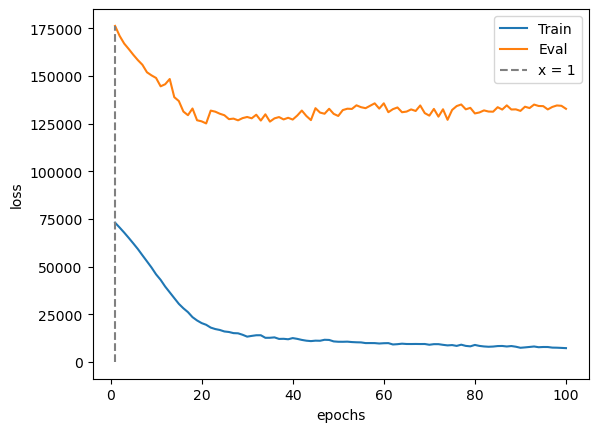

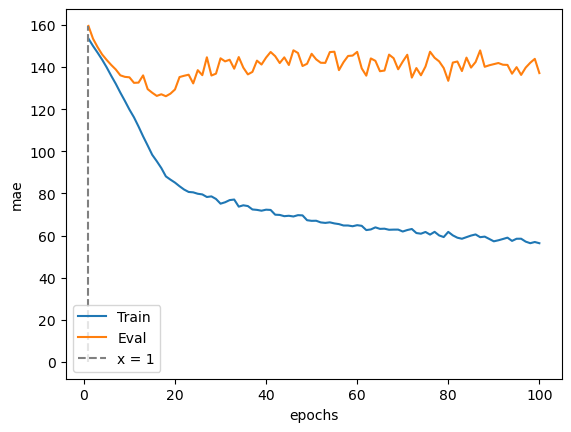

20/20 [==============================] - 0s 2ms/step
Epoch 1/100
45/45 [==============================] - 3s 13ms/step - loss: 72606.5391 - mae: 152.6863 - val_loss: 163435.7969 - val_mae: 166.2287
Epoch 2/100
45/45 [==============================] - 0s 9ms/step - loss: 70085.2969 - mae: 149.1620 - val_loss: 158654.3750 - val_mae: 162.3854
Epoch 3/100
45/45 [==============================] - 0s 9ms/step - loss: 67430.2109 - mae: 145.9498 - val_loss: 155620.4531 - val_mae: 159.2877
Epoch 4/100
45/45 [==============================] - 0s 9ms/step - loss: 64696.7305 - mae: 142.5000 - val_loss: 153210.8125 - val_mae: 157.2510
Epoch 5/100
45/45 [==============================] - 0s 10ms/step - loss: 61800.4961 - mae: 138.8874 - val_loss: 151986.2812 - val_mae: 156.7237
Epoch 6/100
45/45 [==============================] - 0s 9ms/step - loss: 58867.5312 - mae: 135.2997 - val_loss: 148353.4688 - val_mae: 153.1497
Epoch 7/100
45/45 [==============================] - 0s 9ms/step - loss: 55612.30

Epoch 57/100
45/45 [==============================] - 0s 8ms/step - loss: 9454.0576 - mae: 63.7443 - val_loss: 111325.5469 - val_mae: 142.3471
Epoch 58/100
45/45 [==============================] - 0s 9ms/step - loss: 10507.3945 - mae: 65.9381 - val_loss: 109102.7734 - val_mae: 142.9036
Epoch 59/100
45/45 [==============================] - 0s 8ms/step - loss: 9692.4639 - mae: 63.4991 - val_loss: 110447.0156 - val_mae: 147.3466
Epoch 60/100
45/45 [==============================] - 0s 11ms/step - loss: 9115.8613 - mae: 61.8738 - val_loss: 112356.6094 - val_mae: 142.4215
Epoch 61/100
45/45 [==============================] - 0s 9ms/step - loss: 9569.7920 - mae: 64.0874 - val_loss: 111343.3516 - val_mae: 144.1388
Epoch 62/100
45/45 [==============================] - 0s 9ms/step - loss: 9596.5977 - mae: 63.4251 - val_loss: 112678.5078 - val_mae: 143.2550
Epoch 63/100
45/45 [==============================] - 0s 10ms/step - loss: 8952.8926 - mae: 61.2236 - val_loss: 112280.4141 - val_mae: 144.8

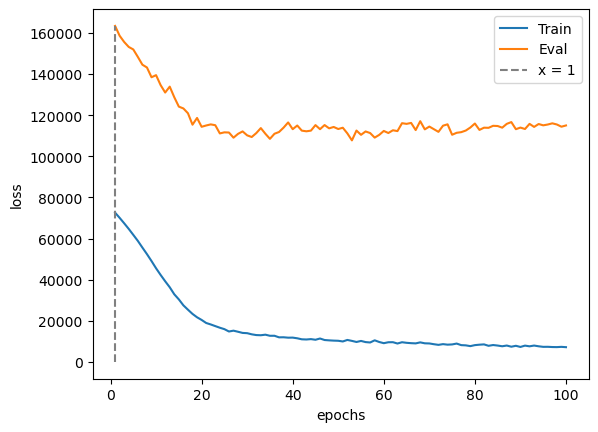

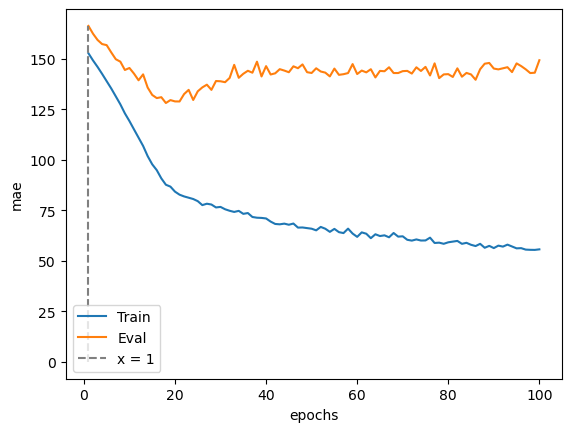

20/20 [==============================] - 0s 2ms/step
Epoch 1/100
45/45 [==============================] - 2s 15ms/step - loss: 61757.3828 - mae: 140.9010 - val_loss: 286185.3438 - val_mae: 273.1091
Epoch 2/100
45/45 [==============================] - 1s 12ms/step - loss: 59405.9453 - mae: 137.4407 - val_loss: 280539.9688 - val_mae: 268.8120
Epoch 3/100
45/45 [==============================] - 1s 12ms/step - loss: 57055.1406 - mae: 134.3191 - val_loss: 275774.3750 - val_mae: 265.4546
Epoch 4/100
45/45 [==============================] - 1s 12ms/step - loss: 54627.9102 - mae: 131.0159 - val_loss: 267935.9062 - val_mae: 259.6370
Epoch 5/100
45/45 [==============================] - 1s 12ms/step - loss: 52075.5195 - mae: 127.4852 - val_loss: 266760.7188 - val_mae: 258.2168
Epoch 6/100
45/45 [==============================] - 0s 10ms/step - loss: 49463.0273 - mae: 124.1275 - val_loss: 259467.7969 - val_mae: 252.0921
Epoch 7/100
45/45 [==============================] - 0s 11ms/step - loss: 466

Epoch 57/100
45/45 [==============================] - 0s 10ms/step - loss: 8696.3662 - mae: 60.6447 - val_loss: 163065.5469 - val_mae: 189.1656
Epoch 58/100
45/45 [==============================] - 0s 10ms/step - loss: 8801.7861 - mae: 60.5628 - val_loss: 165677.1719 - val_mae: 188.3337
Epoch 59/100
45/45 [==============================] - 0s 10ms/step - loss: 8200.1328 - mae: 59.1455 - val_loss: 162382.0469 - val_mae: 187.7727
Epoch 60/100
45/45 [==============================] - 0s 10ms/step - loss: 7904.2212 - mae: 57.5022 - val_loss: 162762.0625 - val_mae: 186.3259
Epoch 61/100
45/45 [==============================] - 0s 10ms/step - loss: 8210.8584 - mae: 59.7294 - val_loss: 160489.9844 - val_mae: 188.1308
Epoch 62/100
45/45 [==============================] - 0s 10ms/step - loss: 8160.8428 - mae: 58.6038 - val_loss: 161484.8281 - val_mae: 189.2593
Epoch 63/100
45/45 [==============================] - 0s 10ms/step - loss: 8305.2383 - mae: 59.0542 - val_loss: 158864.7812 - val_mae: 1

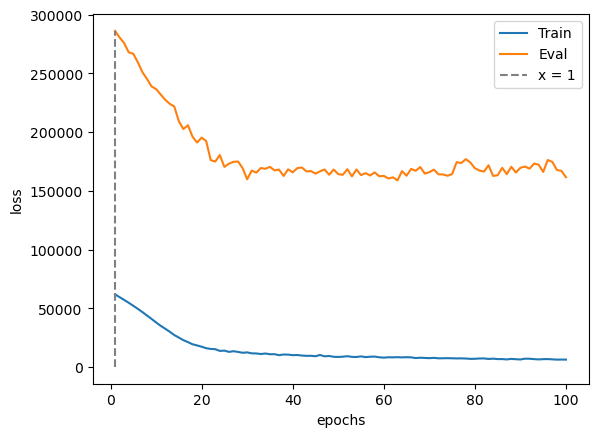

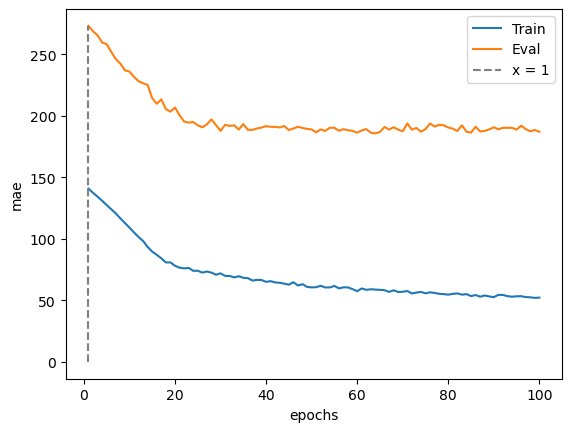

20/20 [==============================] - 0s 3ms/step
Epoch 1/100
45/45 [==============================] - 2s 12ms/step - loss: 69449.8828 - mae: 149.4354 - val_loss: 154125.5625 - val_mae: 189.0678
Epoch 2/100
45/45 [==============================] - 0s 9ms/step - loss: 67038.2031 - mae: 145.9559 - val_loss: 148500.2500 - val_mae: 184.7884
Epoch 3/100
45/45 [==============================] - 0s 9ms/step - loss: 64449.6172 - mae: 142.8342 - val_loss: 147117.7500 - val_mae: 183.5477
Epoch 4/100
45/45 [==============================] - 0s 10ms/step - loss: 61789.0312 - mae: 139.3594 - val_loss: 141959.2188 - val_mae: 178.2176
Epoch 5/100
45/45 [==============================] - 0s 9ms/step - loss: 58951.8945 - mae: 135.7097 - val_loss: 138474.0156 - val_mae: 175.5659
Epoch 6/100
45/45 [==============================] - 0s 9ms/step - loss: 56047.0820 - mae: 132.0927 - val_loss: 134892.3750 - val_mae: 172.9526
Epoch 7/100
45/45 [==============================] - 0s 9ms/step - loss: 52800.12

45/45 [==============================] - 0s 10ms/step - loss: 9687.7432 - mae: 64.0353 - val_loss: 88519.0547 - val_mae: 149.2069
Epoch 58/100
45/45 [==============================] - 0s 9ms/step - loss: 9218.5000 - mae: 63.4564 - val_loss: 89481.7500 - val_mae: 147.9258
Epoch 59/100
45/45 [==============================] - 0s 9ms/step - loss: 8881.1641 - mae: 62.4449 - val_loss: 90762.5859 - val_mae: 148.5444
Epoch 60/100
45/45 [==============================] - 0s 9ms/step - loss: 8863.2412 - mae: 61.5958 - val_loss: 89933.3203 - val_mae: 152.3120
Epoch 61/100
45/45 [==============================] - 0s 9ms/step - loss: 9367.0771 - mae: 63.4864 - val_loss: 90326.0938 - val_mae: 148.3630
Epoch 62/100
45/45 [==============================] - 0s 9ms/step - loss: 9206.4346 - mae: 62.5595 - val_loss: 90474.6328 - val_mae: 151.2196
Epoch 63/100
45/45 [==============================] - 0s 10ms/step - loss: 9344.3262 - mae: 62.9124 - val_loss: 88983.5391 - val_mae: 147.0898
Epoch 64/100
45/4

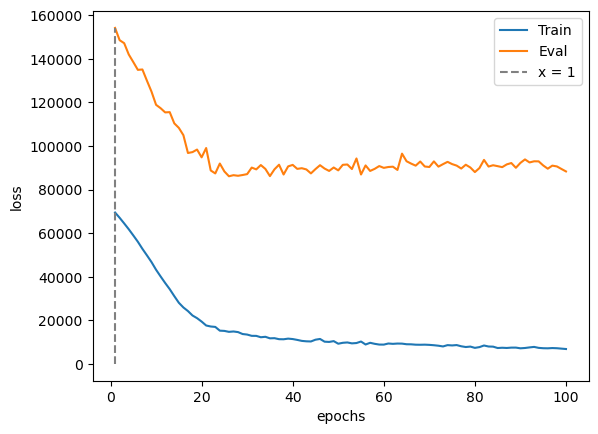

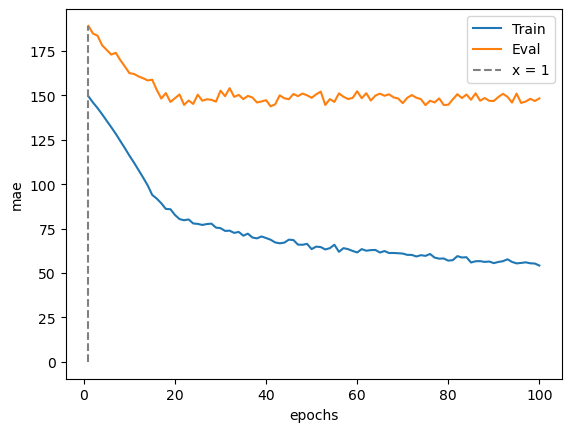

20/20 [==============================] - 0s 3ms/step
MAE on train set:  34.835906081520115
min prediction: 0.0
max prediction: 852.0

MAE on test set:  141.79563774300615
Error <= 30: 39.21 %
min prediction: 0.0
max prediction: 852.0


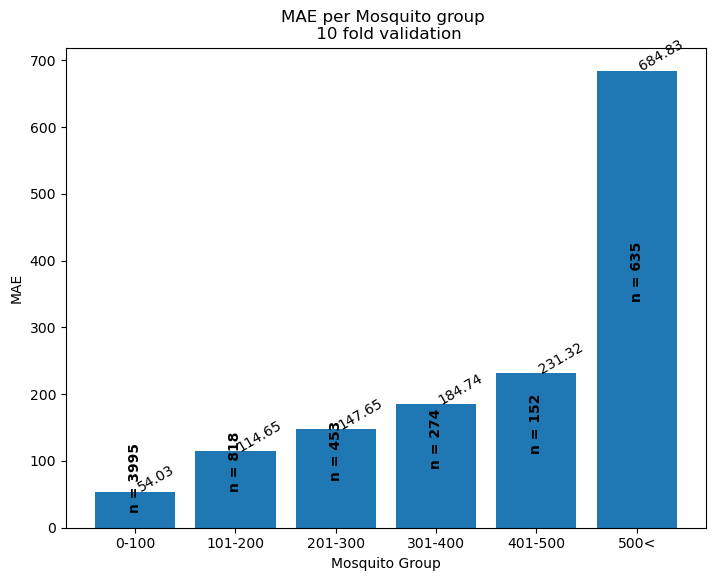

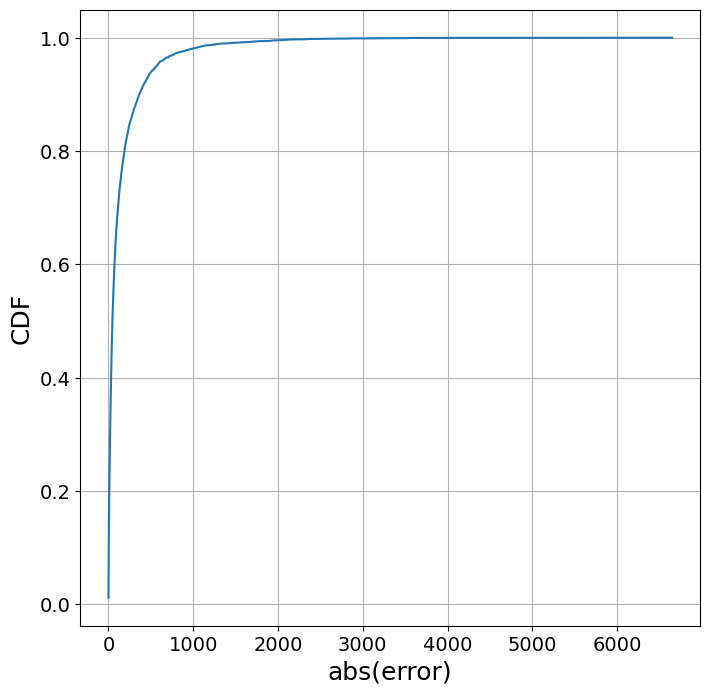

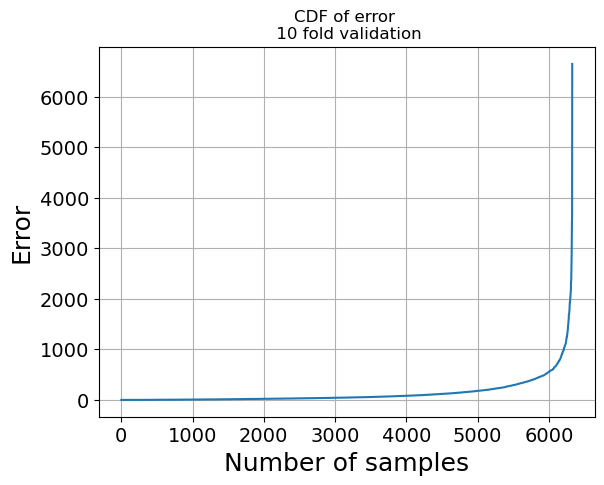

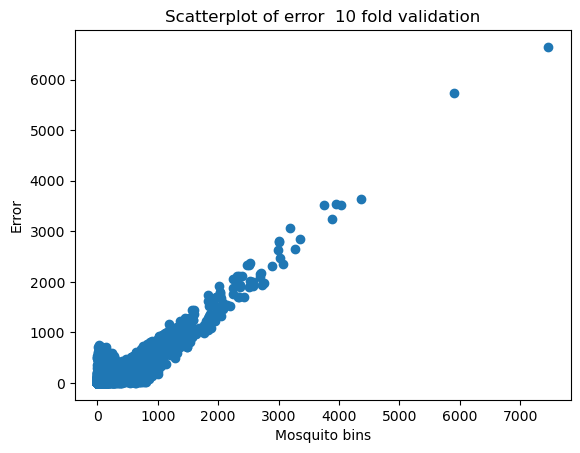

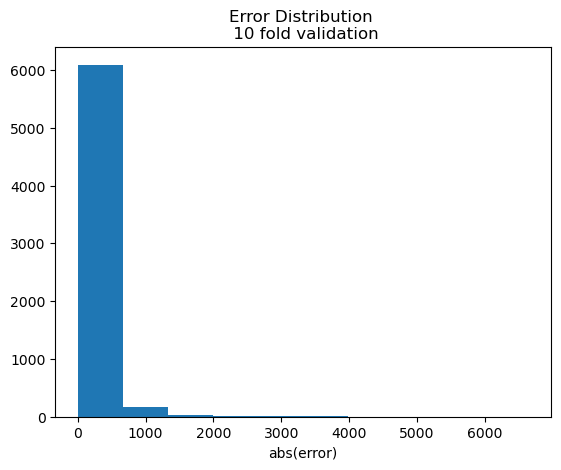

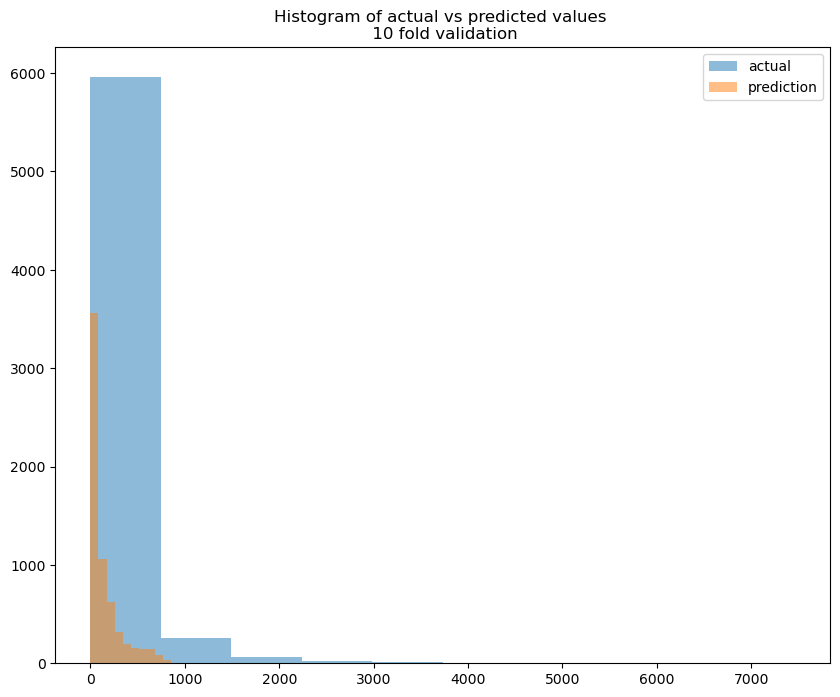

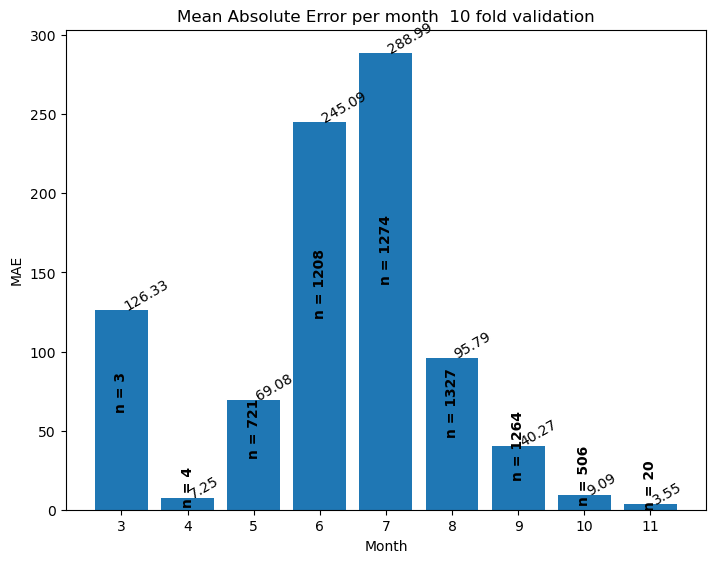

In [9]:
train_model_KFold(data, model, date_col='dt_placement')